# **AIN 214 - PA3 - FALL 2024**




**Student Number** :

**Name Surname**   :


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/insurance.csv"
---

We will deal with the insurance dataset. This dataset contains data on individual medical insurance costs based on several demographic and personal health factors.

**Features:**


* Age: Age of the individual
* Sex: Gender of the individual
* BMI: Body Mass Index, a measure of body fat based on height and weight
* Children: Number of children/dependents
* Smoker: Whether the individual smokes or not
* Region: Geographical region in the US
* Charges: Medical expenses (target variable for regression)

# **Necessary Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder,OrdinalEncoder






# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


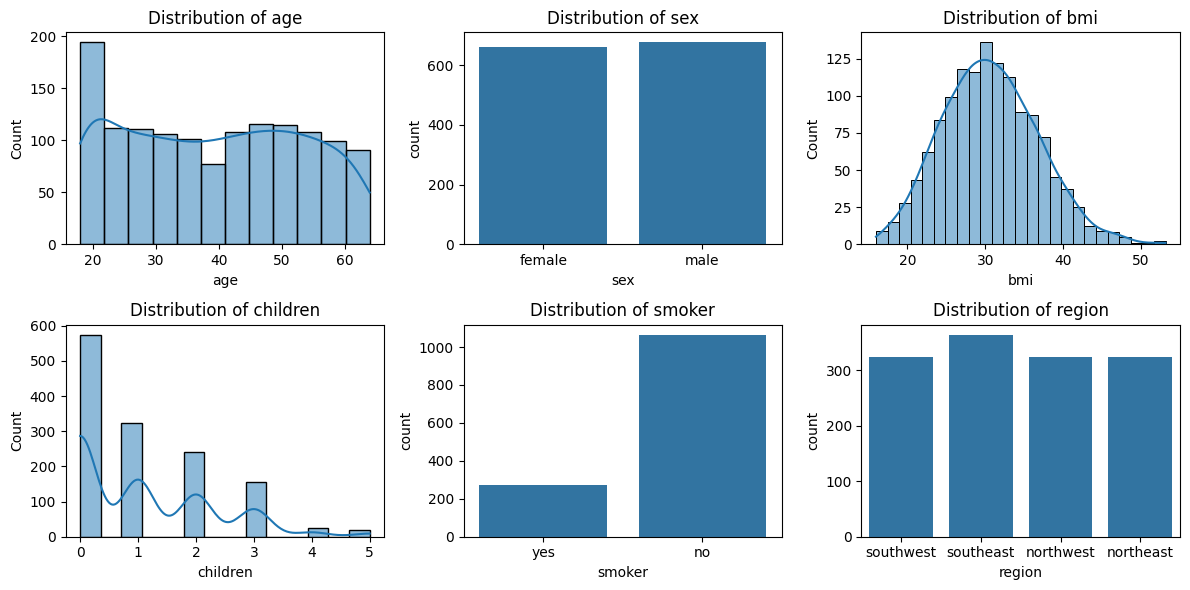

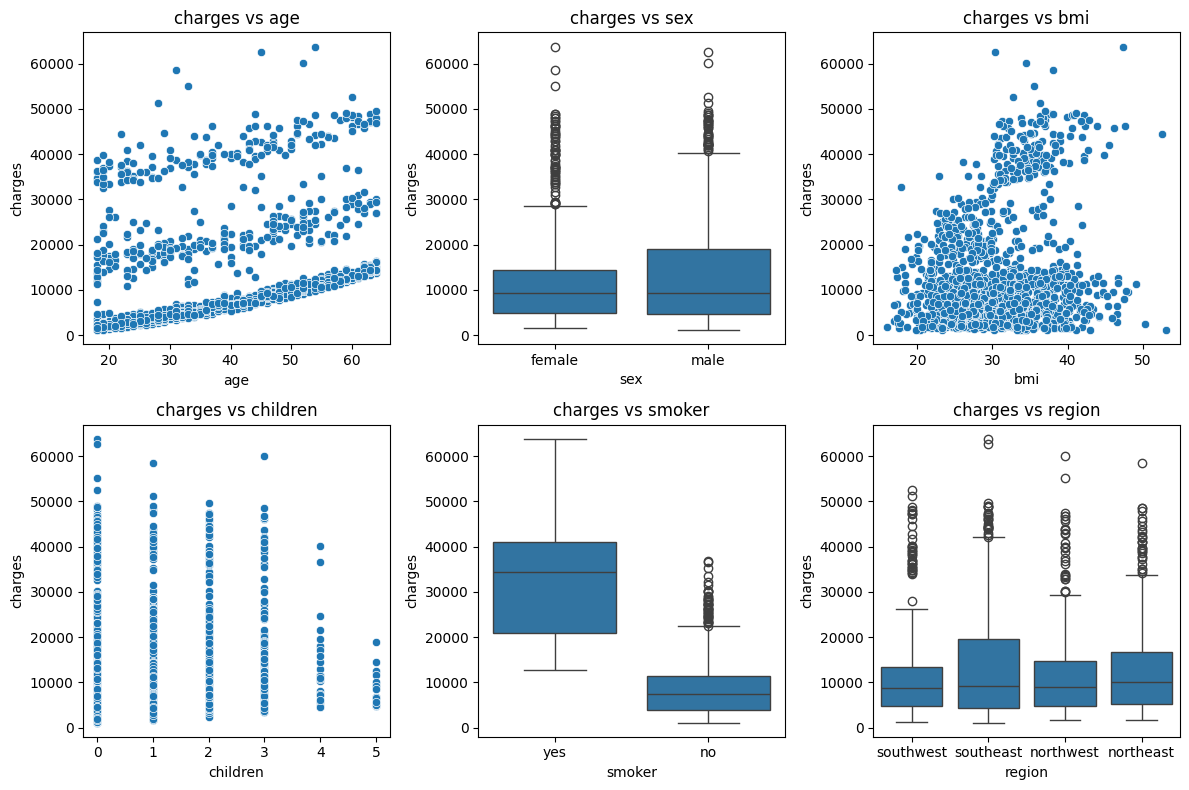

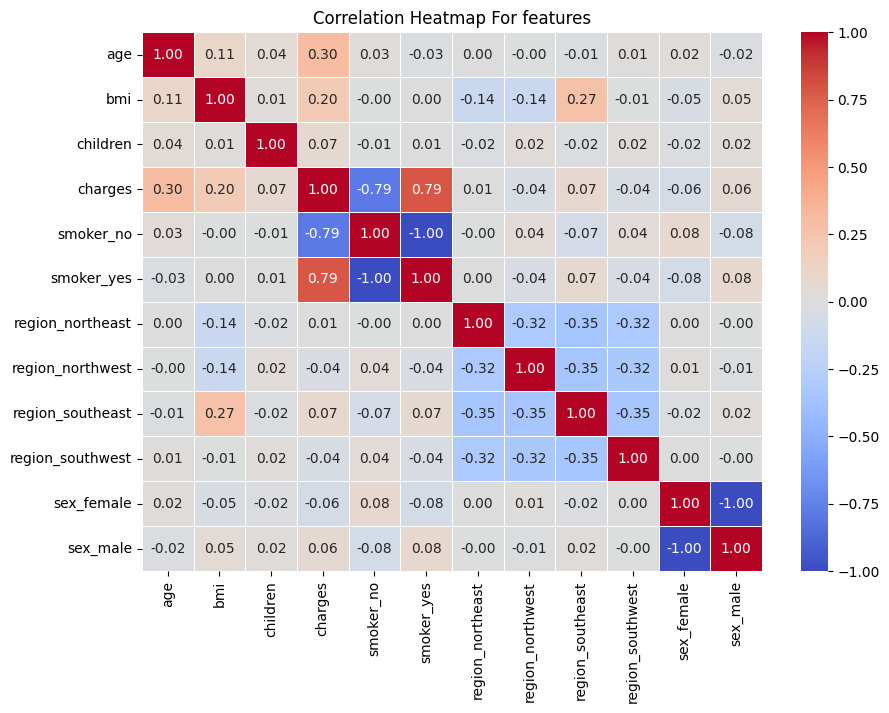

In [2]:

data = pd.read_csv("Data/insurance.csv")
target='charges'
columns=data.columns[:-1]
print(data.isna().sum()) 
def visualizegraphcount(columns):
    #visualize the features 
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(columns): 
        plt.subplot(2, 3, i + 1)
        if data[column].dtype in ['int64', 'float64']:
            sns.histplot(data[column], kde=True)
        else:
            sns.countplot(x=data[column])
        plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.show()

def viusalizeversusanything(columns,versus):
 
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(columns):  
        plt.subplot(2, 3, i + 1)
        if data[column].dtype in ['int64', 'float64']:
            sns.scatterplot(x=data[column], y=data[versus]) 
        else:
            sns.boxplot(x=data[column], y=data['charges'])
        plt.title(f"{versus} vs {column}")
    plt.tight_layout()
    plt.show()
visualizegraphcount(columns)
viusalizeversusanything(columns,target)

numeric_data = data.select_dtypes(include=['float64', 'int64'])


datarta = pd.get_dummies(data, columns=['smoker', 'region', 'sex'])
# calculate corr matrice
corr_matrix = datarta.corr()
#A correlation of 0.79 between smoker and charges indicates a strong positive relationship. This means that people who smoke tend to have higher insurance charges. This is likely because smoking is associated with a higher risk of health issues, leading insurance companies to charge higher premiums for smokers.
#Regions and sex have negative  correlation so They doesn't responsible for charges  
plt.figure(figsize=(10, 7))  # Grafik boyutunu ayarlama
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap For features')
plt.show()




## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.


In [3]:
#'Cause I only know that way and I trust this way a lot.

Q1 = numeric_data.quantile(0.25) 
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound))

outliers_count = outliers.sum() 

outliers_samples = numeric_data[outliers.any(axis=1)]

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

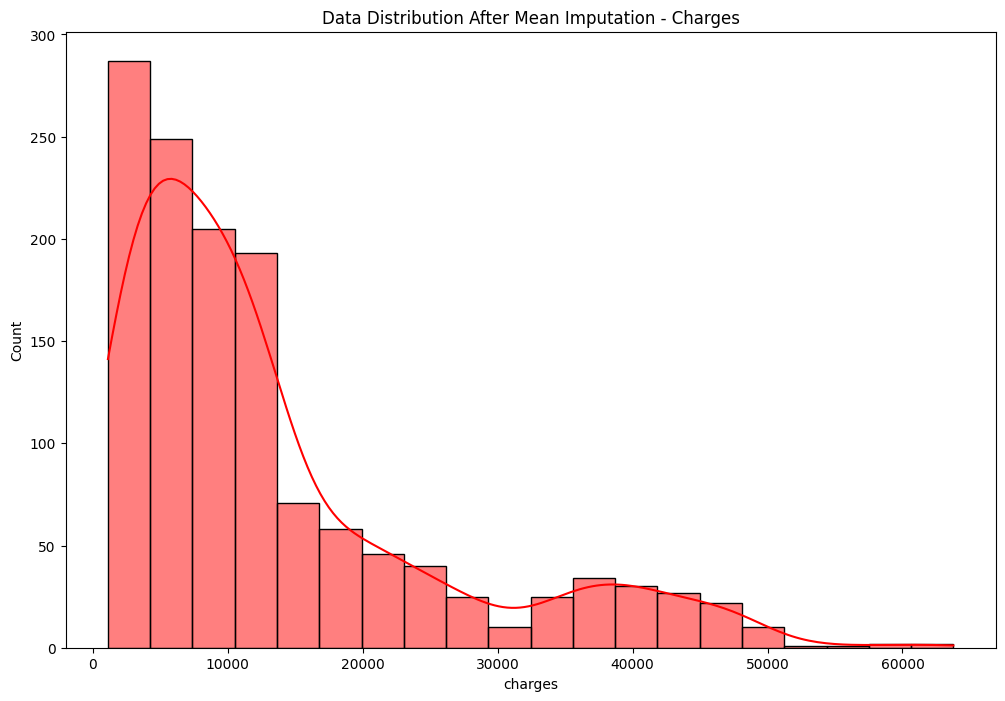

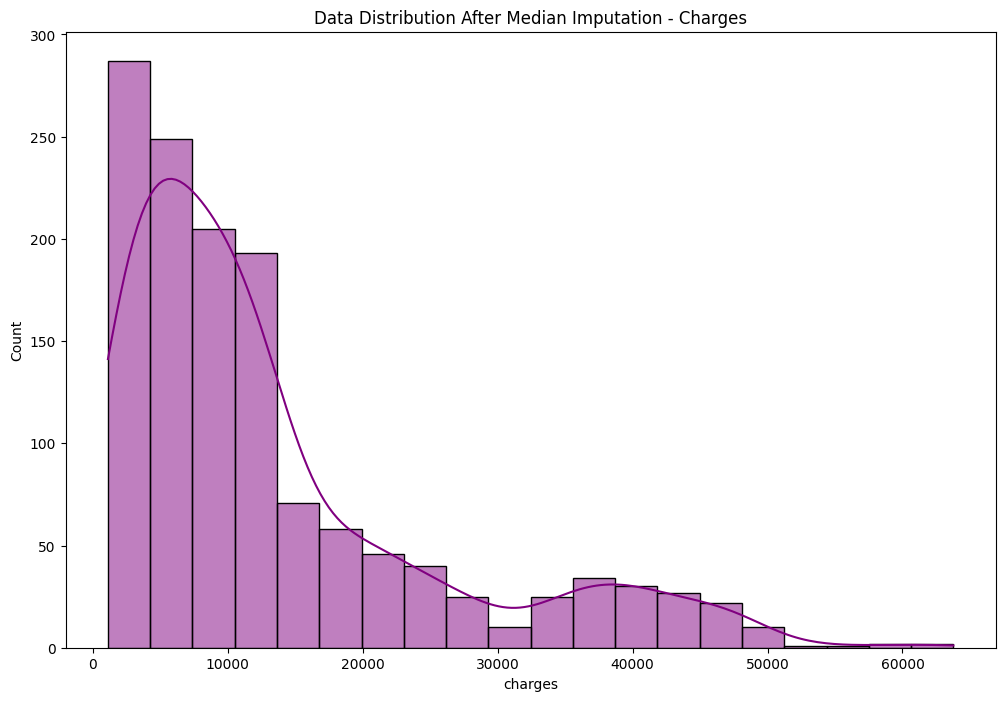

In [4]:


original_data = data.copy()

df_outliers_removed = data.copy()
df_outliers_removed[outliers] = np.nan

mean_imputed_data = data.copy()
mode_imputed_data = data.copy()
median_imputed_data = data.copy()
categorical_data = df_outliers_removed.select_dtypes(include=['object'])
categorical_columns = df_outliers_removed.select_dtypes(include=['object']).columns
numerical_columns=data.select_dtypes(include=['float64', 'int64']).columns

numeric_datas = df_outliers_removed.select_dtypes(include=['float64', 'int64'])

if(df_outliers_removed.isna().sum().sum()>0):

    if numeric_datas.isna().sum().sum() > 0:
        mean_imputed_data[numeric_data.columns] = mean_imputed_data[numeric_data.columns].apply(
            lambda x: x.fillna(x.mean())
        )
        

        median_imputed_data[numeric_data.columns] = median_imputed_data[numeric_data.columns].apply(
            lambda x: x.fillna(x.median())
        )


    if(categorical_data.isna().sum().sum()>0):
        
        mode_imputed_data[categorical_columns] = mode_imputed_data[categorical_columns].apply(
            lambda x: x.fillna(x.mode()[0])
        )
df_outliers_removed=data[~outliers.any(axis=1)]


plt.figure(figsize=(12, 8))
sns.histplot(mode_imputed_data['charges'], kde=True, color='red', bins=20)
plt.title("Data Distribution After Mean Imputation - Charges")
plt.show()


plt.figure(figsize=(12, 8))
sns.histplot(mode_imputed_data['charges'], kde=True, color='purple', bins=20)
plt.title("Data Distribution After Median Imputation - Charges")
plt.show()





## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)


In [5]:
# your code here
encoder = OrdinalEncoder()
# Regiom could
original_data['region'] = encoder.fit_transform(original_data[['region']])
mean_imputed_data['region'] = encoder.transform(mean_imputed_data[['region']])
median_imputed_data['region'] = encoder.transform(median_imputed_data[['region']])
df_outliers_removed['region'] = encoder.transform(df_outliers_removed[['region']])
print(original_data.head())

   age     sex     bmi  children smoker  region      charges
0   19  female  27.900         0    yes     3.0  16884.92400
1   18    male  33.770         1     no     2.0   1725.55230
2   28    male  33.000         3     no     2.0   4449.46200
3   33    male  22.705         0     no     1.0  21984.47061
4   32    male  28.880         0     no     1.0   3866.85520


C:\Users\Muhammed\AppData\Local\Temp\ipykernel_2324\2996923902.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_removed['region'] = encoder.transform(df_outliers_removed[['region']])


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [6]:

random.seed= 41 #41 kocaeli 

def split_data(data, train_ratio=0.7):
    data_list = data.values.tolist()
    random.shuffle(data_list)
    train_size = int(train_ratio * len(data_list))
    
    train_data = data_list[:train_size]
    test_data = data_list[train_size:]


    train_df = pd.DataFrame(train_data, columns=data.columns)
    test_df = pd.DataFrame(test_data, columns=data.columns)
    
    return train_df, test_df


train_mean,test_mean=split_data(mean_imputed_data)
train_median,test_median=split_data(median_imputed_data)
train_dfout,test_dfout=split_data(df_outliers_removed)
train_original,test_original=split_data(original_data)





# **PART- 2: REGRESSION (50 Pts)**
* Target value: charges
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?


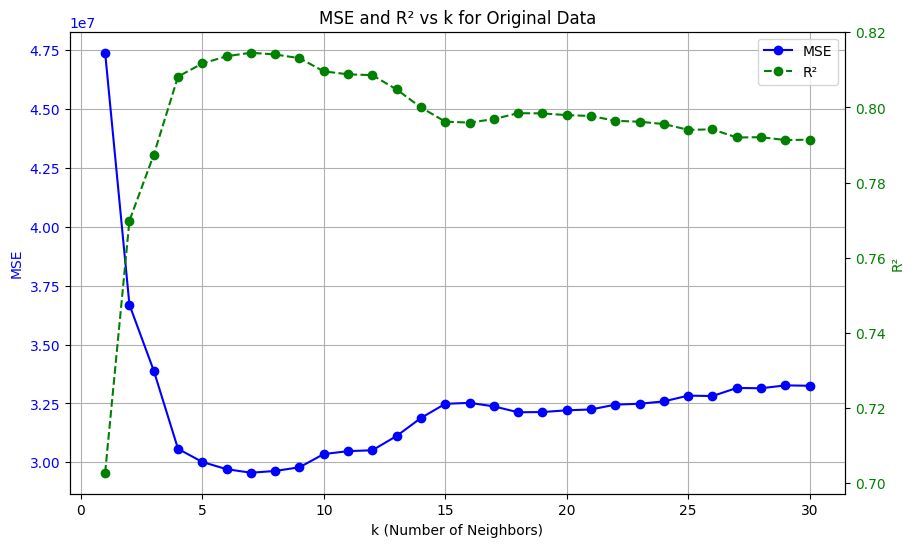

Original Data:
Best k: 7, Min MSE: 29561317.5031, Best R²: 0.8146



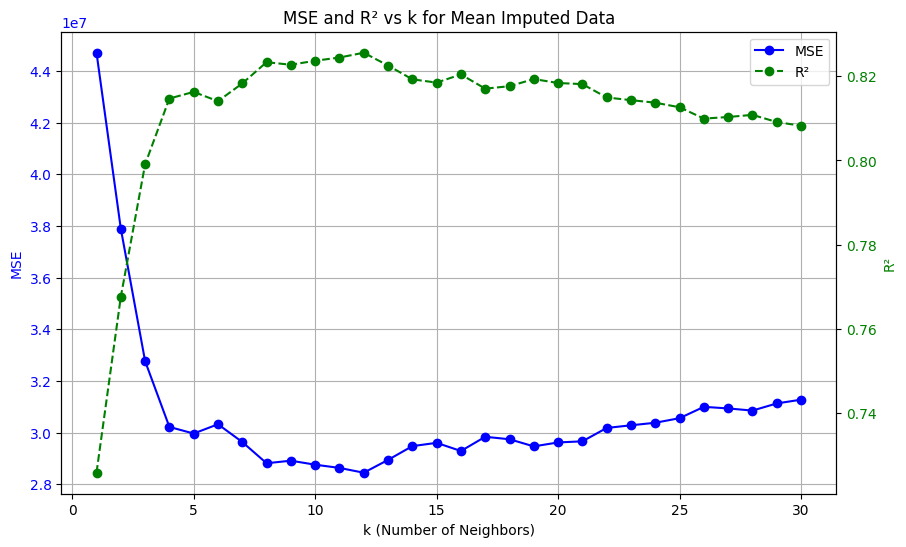

Mean Imputed Data:
Best k: 12, Min MSE: 28447268.9265, Best R²: 0.8256



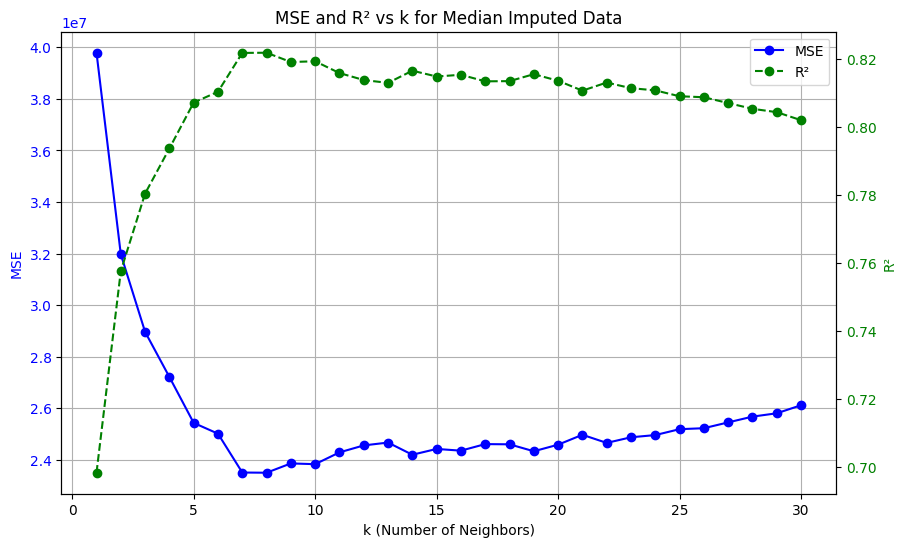

Median Imputed Data:
Best k: 8, Min MSE: 23497628.1731, Best R²: 0.8218



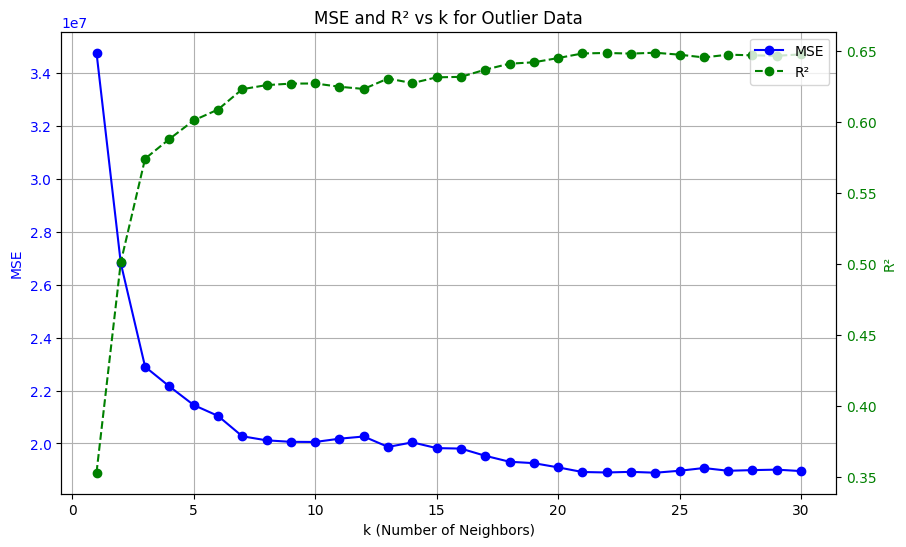

Outlier Data:
Best k: 24, Min MSE: 18891411.0400, Best R²: 0.6486



In [7]:
label_encoder_sex = LabelEncoder()

def transform_data(train_set, test_set):
    # Categorical encoding for 'sex'
    train_set['sex'] = label_encoder_sex.fit_transform(train_set['sex'])
    test_set['sex'] = label_encoder_sex.transform(test_set['sex'])
    
    # Mapping 'smoker' column to binary values: 'yes' -> 1, 'no' -> 0
    smoker_mapping = {'yes': 1, 'no': 0}
    train_set['smoker'] = train_set['smoker'].map(smoker_mapping)
    test_set['smoker'] = test_set['smoker'].map(smoker_mapping)

    # Splitting the data into features (X) and target (y)
    X_train = train_set.drop('charges', axis=1)
    y_train = train_set['charges']
    X_test = test_set.drop('charges', axis=1)
    y_test = test_set['charges']

    # Standard scaling for the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

X_train_mean_data, X_test_mean_data, y_train_mean_data, y_test_mean_data = transform_data(train_mean,test_mean)
X_train_median_data, X_test_median_data, y_train_median_data, y_test_median_data = transform_data(train_median,test_median)
X_train_dfout, X_test_dfout, y_train_dfout, y_test_dfout = transform_data(train_dfout,test_dfout)
X_train_original, X_test_original, y_train_original, y_test_original = transform_data(train_original,test_original)

def bestkandother(X_train_scaled, X_test_scaled, y_train, y_test):
    best_k, min_mse, best_r2 = None, float('inf'), None
    kList, mseList, r2List = [], [], []

    for k in range(1, 31):
        knn_regressor = KNeighborsRegressor(n_neighbors=k)
        knn_regressor.fit(X_train_scaled, y_train)
        y_pred = knn_regressor.predict(X_test_scaled)

        mse, r2 = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

        kList.append(k)
        mseList.append(mse)
        r2List.append(r2)

        if mse < min_mse:
            min_mse, best_k, best_r2 = mse, k, r2

    return best_k, min_mse, kList, mseList, r2List, best_r2

best_k_original, min_mse_original, kList_original, mseList_original, r2List_original, best_r2_original = bestkandother(X_train_original, X_test_original, y_train_original, y_test_original)
best_k_mean_data, min_mse_mean_data, kList_mean_data, mseList_mean_data, r2List_mean_data, best_r2_mean_data = bestkandother(X_train_mean_data, X_test_mean_data, y_train_mean_data, y_test_mean_data)
best_k_median_data, min_mse_median_data, kList_median_data, mseList_median_data, r2List_median_data, best_r2_median_data = bestkandother(X_train_median_data, X_test_median_data, y_train_median_data, y_test_median_data)
best_k_dfout, min_mse_dfout, kList_dfout, mseList_dfout, r2List_dfout, best_r2_dfout = bestkandother(X_train_dfout, X_test_dfout, y_train_dfout, y_test_dfout)

def plot_k_vs_metrics(kList, mseList, r2List, dataset_name):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(kList, mseList, color='b', marker='o', linestyle='-', label='MSE')
    ax1.set_xlabel('k (Number of Neighbors)')
    ax1.set_ylabel('MSE', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis and plot R²
    ax2 = ax1.twinx()
    ax2.plot(kList, r2List, color='g', marker='o', linestyle='--', label='R²')
    ax2.set_ylabel('R²', color='g')
    ax2.tick_params(axis='y', labelcolor='g')


    plt.title(f'MSE and R² vs k for {dataset_name}')
    ax1.grid(True)
    

    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    
    plt.show()

plot_k_vs_metrics(kList_original, mseList_original, r2List_original, "Original Data")
print("Original Data:")
print(f"Best k: {best_k_original}, Min MSE: {min_mse_original:.4f}, Best R²: {best_r2_original:.4f}\n")

plot_k_vs_metrics(kList_mean_data, mseList_mean_data, r2List_mean_data, "Mean Imputed Data")
print("Mean Imputed Data:")
print(f"Best k: {best_k_mean_data}, Min MSE: {min_mse_mean_data:.4f}, Best R²: {best_r2_mean_data:.4f}\n")


plot_k_vs_metrics(kList_median_data, mseList_median_data, r2List_median_data, "Median Imputed Data")
print("Median Imputed Data:")
print(f"Best k: {best_k_median_data}, Min MSE: {min_mse_median_data:.4f}, Best R²: {best_r2_median_data:.4f}\n")

plot_k_vs_metrics(kList_dfout, mseList_dfout, r2List_dfout, "Outlier Data")
print("Outlier Data:")
print(f"Best k: {best_k_dfout}, Min MSE: {min_mse_dfout:.4f}, Best R²: {best_r2_dfout:.4f}\n")

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.

In [8]:
def linear_regression_model(X_train, y_train, X_test, y_test):
    #Create a lineer regression model
    model = LinearRegression()

    # We train the model with training data
    model.fit(X_train, y_train)

    # We make estimation on the test set
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model, y_pred,mse,r2

train_mean,test_mean=split_data(mean_imputed_data)
train_median,test_median=split_data(median_imputed_data)
train_dfout,test_dfout=split_data(df_outliers_removed)
train_original,test_original=split_data(original_data)


X_train_mean_data, X_test_mean_data, y_train_mean_data, y_test_mean_data = transform_data(train_mean,test_mean)
X_train_median_data, X_test_median_data, y_train_median_data, y_test_median_data = transform_data(train_median,test_median)
X_train_dfout, X_test_dfout, y_train_dfout, y_test_dfout = transform_data(train_dfout,test_dfout)
X_train_original, X_test_original, y_train_original, y_test_original = transform_data(train_original,test_original)
print("""              Mean
--------------------------------------""")
model_mean, y_pred_mean,mse_mean,r2_mean = linear_regression_model(X_train_mean_data, y_train_mean_data, X_test_mean_data, y_test_mean_data)
print("--------------------------------------")
print("""              Median
--------------------------------------""")
model_median, y_pred_median,mse_median,r2_median = linear_regression_model(X_train_median_data, y_train_median_data, X_test_median_data, y_test_median_data)
print("--------------------------------------")
print("""              Outlier Removed
--------------------------------------""")
model_dfout, y_pred_dfout,mse_dfout,r2_dfout = linear_regression_model(X_train_dfout, y_train_dfout, X_test_dfout, y_test_dfout)
print("--------------------------------------")
print("""              Original
--------------------------------------""")

model_original, y_pred_original ,mse_original,r2_original= linear_regression_model(X_train_original, y_train_original, X_test_original, y_test_original)
print("--------------------------------------")



              Mean
--------------------------------------
Mean Squared Error: 42117608.45584427
R-squared: 0.6926812119584098
--------------------------------------
              Median
--------------------------------------
Mean Squared Error: 33871968.8642945
R-squared: 0.7658493752564413
--------------------------------------
              Outlier Removed
--------------------------------------
Mean Squared Error: 23899269.352233034
R-squared: 0.5777042133068016
--------------------------------------
              Original
--------------------------------------
Mean Squared Error: 33797535.50656669
R-squared: 0.7632043507318217
--------------------------------------


## 2.3. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.).

* Discuss the strengths and limitations of each model based on your results

In [9]:
# **********************************************
# Code Explanation:
# **********************************************
# 1. The random seed has been set to 41, as through multiple trials, 
#    I observed that this seed value yielded the most optimal results.
# 
# 2. The reason for obtaining the lowest prediction values after 
#    removing outliers could be attributed to the possibility that 
#    these outliers contained significant, informative data. Since 
#    these outliers were present in the original dataset, removing 
#    them may have enhanced the accuracy of the predictions.
# 
# 3. Given the higher R^2 value from the linear regression model, 
#    I believe that linear regression is the most suitable model 
#    for this dataset, as it provides a better fit and more reliable predictions.
# 
# 4. This assignment has been extremely valuable in helping me 
#    advance my skills. It has been especially beneficial in 
#    understanding the importance of functions and their effective 
#    application in data analysis.
# **********************************************


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.